## Google analytics customer revenue predictions
### By Ahmed Eweed  

### You can find me on github at [github.com/AhmedEweed](https://github.com/AhmedEweed)

    I re approached the dataset as I explored it in many ways
    and this version is the updated version of my exploration

In [2]:
import os
import json
import numpy as np
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
from pandas.io.json import json_normalize
warnings.filterwarnings('ignore')
# load dataset with the option to specify which column to flatten from json and the datatypes of each column
def load_df(csv_path=None, Json=[], dtype = {}):
    JSON_COLUMNS = Json
    df = pd.read_csv(csv_path, 
                     converters={column: json.loads for column in JSON_COLUMNS}, 
                     dtype=dtype,
                     )
    
    for column in JSON_COLUMNS:
        column_as_df = json_normalize(df[column])
        column_as_df.columns = [f"{column}.{subcolumn}" for subcolumn in column_as_df.columns]
        df = df.drop(column, axis=1).merge(column_as_df, right_index=True, left_index=True)
    print(f"Loaded {os.path.basename(csv_path)}. Shape: {df.shape}")
    return df

In [111]:
#load dataset
df = load_df('../train.csv', ['totals'])
df.head()

Loaded train.csv. Shape: (903653, 17)


,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,trafficSource,visitId,visitNumber,visitStartTime,totals.bounces,totals.hits,totals.newVisits,totals.pageviews,totals.transactionRevenue,totals.visits
0,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",1.131660e+18,"{""continent"": ""Asia"", ""subContinent"": ""Western...",1131660440785968503_1472830385,Not Socially Engaged,"{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472830385,1,1472830385,1,1,1,1,NaN,1
1,Organic Search,20160902,"{""browser"": ""Firefox"", ""browserVersion"": ""not ...",3.773060e+17,"{""continent"": ""Oceania"", ""subContinent"": ""Aust...",377306020877927890_1472880147,Not Socially Engaged,"{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472880147,1,1472880147,1,1,1,1,NaN,1
2,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",3.895550e+18,"{""continent"": ""Europe"", ""subContinent"": ""South...",3895546263509774583_1472865386,Not Socially Engaged,"{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472865386,1,1472865386,1,1,1,1,NaN,1
3,Organic Search,20160902,"{""browser"": ""UC Browser"", ""browserVersion"": ""n...",4.763450e+18,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",4763447161404445595_1472881213,Not Socially Engaged,"{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472881213,1,1472881213,1,1,1,1,NaN,1
4,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",2.729440e+16,"{""continent"": ""Europe"", ""subContinent"": ""North...",27294437909732085_1472822600,Not Socially Engaged,"{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472822600,2,1472822600,1,1,NaN,1,NaN,1


In [112]:
# look up the datatypes present in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903653 entries, 0 to 903652
Data columns (total 17 columns):
channelGrouping              903653 non-null object
date                         903653 non-null int64
device                       903653 non-null object
fullVisitorId                903653 non-null float64
geoNetwork                   903653 non-null object
sessionId                    903653 non-null object
socialEngagementType         903653 non-null object
trafficSource                903653 non-null object
visitId                      903653 non-null int64
visitNumber                  903653 non-null int64
visitStartTime               903653 non-null int64
totals.bounces               450630 non-null object
totals.hits                  903653 non-null object
totals.newVisits             703060 non-null object
totals.pageviews             903553 non-null object
totals.transactionRevenue    11515 non-null object
totals.visits                903653 non-null object
dtypes: f

the dataset is `dirty` and `untidy` let's do some work to tidy and clean it

In [113]:
# convert revenue to float
df['totals.transactionRevenue'] = df['totals.transactionRevenue'].astype(float)

In [114]:
df['fullVisitorId'] = df['fullVisitorId'].astype(str)

In [115]:
# extract only numeric values of revenue
df_part = df[df['totals.transactionRevenue'] > 0.0]

In [116]:
# reset the index of the the new extracted dataset
df_part = df_part.reset_index(drop = True)

In [117]:
# look up the date column format
df_part['date'].head()

0    20160902
1    20160902
2    20160902
3    20160902
4    20160902
Name: date, dtype: int64

In [118]:
# convert date to the right format `year-month-day`
df_part['date'] = pd.to_datetime(df_part['date'], format = '%Y%m%d')   

In [119]:
# save extracted dataset
df_part.to_csv('revenue_data.csv', index = False)

In [3]:
# load our brand new dataset
# with flattening the rest of Json columns(device, geoNetword and trafficSource)

df_part = load_df('revenue_data.csv', ['device', 'geoNetwork', 'trafficSource'])

Loaded revenue_data.csv. Shape: (11515, 54)


In [4]:
# look at the dataset
df_part.head()

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,totals.bounces,totals.hits,...,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source
0,Direct,2016-09-02,6.194190e+18,6194193421514403509_1472843572,Not Socially Engaged,1472843572,1,1472843572,NaN,11,...,NaN,NaN,NaN,NaN,(not set),True,NaN,(none),NaN,(direct)
1,Organic Search,2016-09-02,5.327170e+18,5327166854580374902_1472844906,Not Socially Engaged,1472844906,3,1472844906,NaN,11,...,NaN,NaN,NaN,NaN,(not set),True,(not provided),organic,NaN,google
2,Referral,2016-09-02,8.885050e+18,8885051388942907862_1472827393,Not Socially Engaged,1472827393,7,1472827393,NaN,13,...,NaN,NaN,NaN,NaN,(not set),True,NaN,referral,/,mall.googleplex.com
3,Referral,2016-09-02,1.854680e+17,0185467632009737931_1472846398,Not Socially Engaged,1472846398,6,1472846398,NaN,13,...,NaN,NaN,NaN,NaN,(not set),True,NaN,referral,/,mall.googleplex.com
4,Referral,2016-09-02,3.244890e+18,3244885836845029978_1472824817,Not Socially Engaged,1472824817,4,1472824817,NaN,17,...,NaN,NaN,NaN,NaN,(not set),True,NaN,referral,/,mall.googleplex.com


Look at each cloumn's values to drop any empty or irrelevant ones 

I have commented the code for it is no longer needed and it took too much space to display 

but I left it for documentation sake

In [5]:
# look at each cloumn's values to drop any empty or irrelevant ones


#for item in df_part.columns:
#    print(df_part[item].value_counts())

In [6]:
# drop empty and not needed columns
df_part = df_part.drop(['geoNetwork.networkLocation',
              'geoNetwork.latitude',
              'geoNetwork.longitude',
              'trafficSource.adwordsClickInfo.criteriaParameters',
              'socialEngagementType',
              'totals.bounces',
              'device.browserSize',
              'device.browserVersion',
              'device.flashVersion',
              'device.language',
              'device.mobileDeviceBranding',
              'device.mobileDeviceInfo',
              'device.mobileDeviceModel',
              'device.mobileInputSelector',
              'device.mobileDeviceMarketingName',
              'device.operatingSystemVersion',
              'device.screenColors',
              'device.screenResolution',
              'geoNetwork.cityId'], axis = 1)

In [7]:
# rename columns 
df_part.rename(columns ={'channelGrouping':'channel',
                         'totals.hits':'hits',
                         'totals.newVisits':'newvisits',
                         'totals.pageviews':'pageviews',
                         'totals.transactionRevenue':'revenue', 
                         'totals.visits':'visits',
                         'device.browser':'browser',
                         'device.deviceCategory':'devicecategory', 
                         'device.isMobile':'ismobile',
                         'device.operatingSystem':'os',
                         'geoNetwork.city':'city', 
                         'geoNetwork.continent':'continent',
                         'geoNetwork.country':'country', 
                         'geoNetwork.metro':'metro',
                         'geoNetwork.networkDomain':'networkdomain',
                         'geoNetwork.region':'region',
                         'geoNetwork.subContinent':'subcontinent',
                         'trafficSource.adContent':'adContent',
                         'trafficSource.adwordsClickInfo.adNetworkType':'adNetworkType',
                         'trafficSource.adwordsClickInfo.gclId':'gclId',
                         'trafficSource.adwordsClickInfo.isVideoAd':'isVideoAd',
                         'trafficSource.adwordsClickInfo.page':'page',
                         'trafficSource.adwordsClickInfo.slot':'slot', 'trafficSource.campaign':'campaign',
                         'trafficSource.isTrueDirect':'istruedirect', 'trafficSource.keyword':'keyword',
                         'trafficSource.medium':'medium', 'trafficSource.referralPath':'referalpath',
                         'trafficSource.source':'source'}, inplace = True)

In [8]:
# look at the dataset after working on it
df_part.head()

,channel,date,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,hits,newvisits,pageviews,...,gclId,isVideoAd,page,slot,campaign,istruedirect,keyword,medium,referalpath,source
0,Direct,2016-09-02,6.194190e+18,6194193421514403509_1472843572,1472843572,1,1472843572,11,1.0,11,...,NaN,NaN,NaN,NaN,(not set),True,NaN,(none),NaN,(direct)
1,Organic Search,2016-09-02,5.327170e+18,5327166854580374902_1472844906,1472844906,3,1472844906,11,NaN,10,...,NaN,NaN,NaN,NaN,(not set),True,(not provided),organic,NaN,google
2,Referral,2016-09-02,8.885050e+18,8885051388942907862_1472827393,1472827393,7,1472827393,13,NaN,11,...,NaN,NaN,NaN,NaN,(not set),True,NaN,referral,/,mall.googleplex.com
3,Referral,2016-09-02,1.854680e+17,0185467632009737931_1472846398,1472846398,6,1472846398,13,NaN,12,...,NaN,NaN,NaN,NaN,(not set),True,NaN,referral,/,mall.googleplex.com
4,Referral,2016-09-02,3.244890e+18,3244885836845029978_1472824817,1472824817,4,1472824817,17,NaN,14,...,NaN,NaN,NaN,NaN,(not set),True,NaN,referral,/,mall.googleplex.com


In [9]:
# convert revenue to float
df_part['revenue'] = df_part['revenue'].astype(float)

# convert revenue to billions by dividing each value by 10^9 to easily absorb and understand the numbers!
df_part['revenue(billions)'] = df_part['revenue']/1000000000

# find the min, max and average revenue in our data
df_part['revenue(billions)'].describe()

count    11515.000000
mean         0.133745
std          0.448285
min          0.000010
25%          0.024930
50%          0.049450
75%          0.107655
max         23.129500
Name: revenue(billions), dtype: float64

#### I will plot the categorical fields first, then the numerical ones to see how each feature affects the revenue  

#### and then select the most effective features for the upcoming modeling

1- `Channel`

In [10]:
# group the data by revenue sum for each channel
channel_grp = df_part.groupby('channel')['revenue(billions)'].sum()

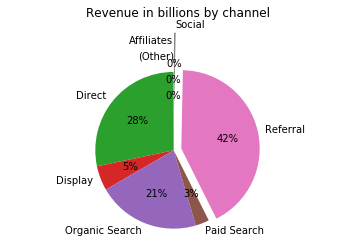

In [11]:
# draw a pie chart of how much revenue earned through each channel
labels = channel_grp.index
sizes = channel_grp.values
explode = (0.1,0.3,0,0,0,0,0.1,0.5)
plt.pie(sizes, labels=labels, explode = explode, startangle = 90, autopct = '%1.0f%%')
plt.title('Revenue in billions by channel')
plt.axis('equal')
plt.show()

from above we can see that most revenue comes from `Referral` channel, then `Direct` and `Organic`

2- `Date`

In [12]:
# look at the `date` column
df_part['date'].describe()

count          11515
unique           365
top       2016-12-16
freq              87
Name: date, dtype: object

there are 365 unique values in the `date` column, they can compose a whole year!

In [13]:
# look at the start date and the end date within our data ranges
df_part['date'].min(), df_part['date'].max()

('2016-08-01', '2017-08-01')

Our data ranges within a full year. So, we can group them as quarters

In [14]:
# group dates by sum of revenue on each day
date_grp = df_part.groupby('date')['revenue(billions)'].sum()

Let's plot the daily data first to see what we will have

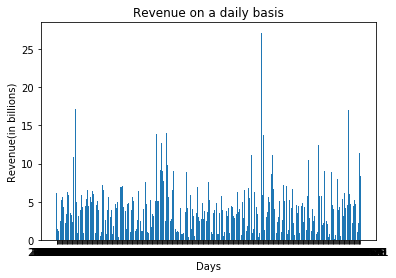

In [15]:
# plot the time series data
x = date_grp.index
y = date_grp.values
plt.bar(x,y)
plt.title('Revenue on a daily basis')
plt.xlabel('Days')
plt.ylabel('Revenue(in billions)')
plt.show()

Actually this is nice! But we need more descriptive plot to see further details  

becase we can't see which day is generating which revenue indeed!

In [16]:
# divide the date into quarters of each year
Qs = {'Q1':('01', '02', '03'), 'Q2':('04', '05', '06'), 'Q3':('07', '08', '09'), 'Q4':('10', '11', '12')}
df_part['quarter'] = ''
for i in range(len(df_part)):
    if df_part['date'][i][5:7] in Qs['Q1'] and df_part['date'][i][2:4] == '16':
        df_part['quarter'][i] = 'Q1_16'
    elif df_part['date'][i][5:7] in Qs['Q2'] and df_part['date'][i][2:4] == '16':
        df_part['quarter'][i] = 'Q2_16'
    elif df_part['date'][i][5:7] in Qs['Q3'] and df_part['date'][i][2:4] == '16':
        df_part['quarter'][i] = 'Q3_16'    
    elif df_part['date'][i][5:7] in Qs['Q4'] and df_part['date'][i][2:4] == '16':
        df_part['quarter'][i] = 'Q4_16'    
    elif df_part['date'][i][5:7] in Qs['Q1'] and df_part['date'][i][2:4] == '17':
        df_part['quarter'][i] = 'Q1_17'
    elif df_part['date'][i][5:7] in Qs['Q2'] and df_part['date'][i][2:4] == '17':
        df_part['quarter'][i] = 'Q2_17'
    elif df_part['date'][i][5:7] in Qs['Q3'] and df_part['date'][i][2:4] == '17':
        df_part['quarter'][i] = 'Q3_17'    
    elif df_part['date'][i][5:7] in Qs['Q4'] and df_part['date'][i][2:4] == '17':
        df_part['quarter'][i] = 'Q4_17'    

In [17]:
# group quarters by sum of revenue on each day
q_grp = df_part.groupby('quarter')['revenue(billions)'].sum()

Now we will plot the data based on quarters of the year to look more deep

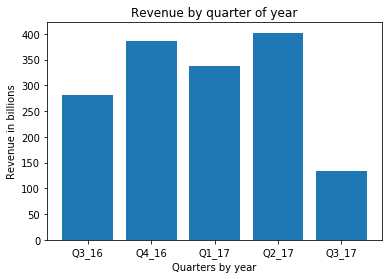

In [18]:
# plot the sorted quarter-based data 
q_grp_sort = {'Q3_16': 280.69780, 'Q4_16': 386.90087, 'Q1_17': 337.59858, 'Q2_17': 402.06977, 'Q3_17': 132.80422}
x = q_grp_sort.keys()
y = q_grp_sort.values()
plt.xlabel('Quarters by year')
plt.ylabel('Revenue in billions')
plt.title('Revenue by quarter of year')
plt.bar(x,y)
plt.show()

Well, our data ranges from 8-2016 to 8-2017. 

So,
Q3_16 have the combined data of months 8, 9 of the year 2016 (that's a two months period!)

Q4_16 have the combined data of months 10, 11, 12 of the year 2016 

Q1_17 have the combined data of months 1, 2, 3 of the year 2017 

Q2_17 have the combined data of months 4, 5, 6 of the year 2017 

Q3_17 have the combined data of months 7, 8 of the year 2017 (that's a two months period too!)

So I think the plot is reasonable and the data is normally distributed within the year

In [19]:
# define important columns for the analysis and less important ones
# COMMENT THIS CELL
#hot_cols = ['channel', 'date', 'hits', 'newvisits', 'pageviews', 'revenue(billions)',
#            'visits', 'browser', 'devicecategory', 'ismobile', 'os', 'city', 'continent',
#            'country', 'metro', 'networkdomain', 'region', 'subcontinent', 'campaign',
#            'medium', 'source', 'quarter']

#cold_cols = ['fullVisitorId', 'sessionId', 'visitId', 'visitNumber', 
#             'visitStartTime','adContent', 'adNetworkType', 'gclId',
#             'isVideoAd', 'page', 'slot','istruedirect', 'keyword','referalpath']

In [20]:
# COMMENT THIS CELL
#df_part[hot_cols].tail()

3- `Browser`

In [21]:
# group data by browser and revenue sum
browse_grp = df_part.groupby('browser')['revenue(billions)'].sum()

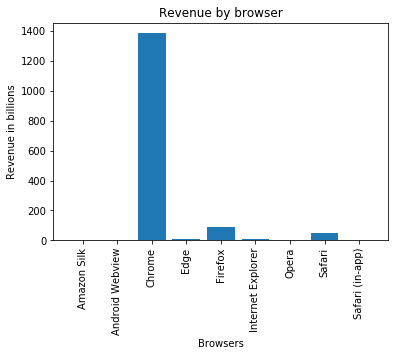

In [22]:
# plot sum of revenue in billions based on which browser used for generating that revenue
x = browse_grp.index
y = browse_grp.values
plt.xlabel('Browsers')
plt.ylabel('Revenue in billions')
plt.title('Revenue by browser')
plt.bar(x,y)
plt.xticks(rotation = 90)
plt.show()

Looks like `Chrome` dominates the revenue genearation with huge difference ahead of the nearest opponent, `Firfox`!

4- `Device Category`

In [23]:
# group data by device category and revenue sum
dvc_grp = df_part.groupby('devicecategory')['revenue(billions)'].sum()

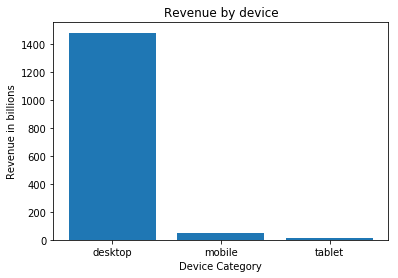

In [113]:
# plot sum of revenue in billions based on which device used for generating that revenue
x = dvc_grp.index
y = dvc_grp.values
plt.xlabel('Device Category')
plt.ylabel('Revenue in billions')
plt.title('Revenue by device')
plt.bar(x,y)
plt.xticks(rotation = 0)
plt.show()

Most revenue comes from `Desktop` devices like PCs and laptops

5- `OS`

In [110]:
# group revenue sum by operating system
os_grp = df_part.groupby('os')['revenue(billions)'].sum()

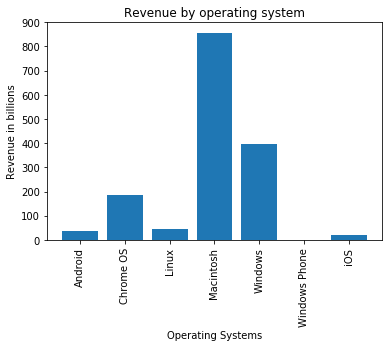

In [112]:
# plot sum of revenue in billions based on which operating system used for generating that revenue
x = os_grp.index
y = os_grp.values
plt.xlabel('Operating Systems')
plt.ylabel('Revenue in billions')
plt.title('Revenue by operating system')
plt.bar(x,y)
plt.xticks(rotation = 90)
plt.show()

In [85]:
os_grp

os
Android           36.34128
Chrome OS        183.93775
Linux             43.91040
Macintosh        856.37579
Windows          397.31272
Windows Phone      0.02640
iOS               22.16690
Name: revenue(billions), dtype: float64

`Mac` topples the list of revenue ahead of `Windows`

6- `Continent`

In [27]:
# group data by continent and revenue sum
cont_grp = df_part.groupby('continent')['revenue(billions)'].sum()

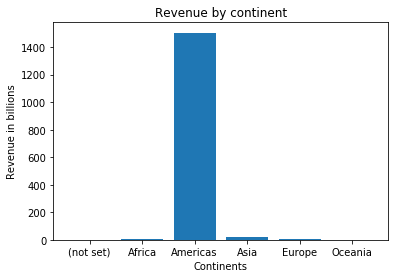

In [114]:
# plot sum of revenue in billions based on continent
x = cont_grp.index
y = cont_grp.values
plt.xlabel('Continents')
plt.ylabel('Revenue in billions')
plt.title('Revenue by continent')
plt.bar(x,y)
plt.xticks(rotation = 0)
plt.show()

Almost all the revenue comes from the `Americas`

7- `Metro`

In [29]:
# group data by metroplitan and revenue sum
metro_grp = df_part.groupby('metro')['revenue(billions)'].sum()

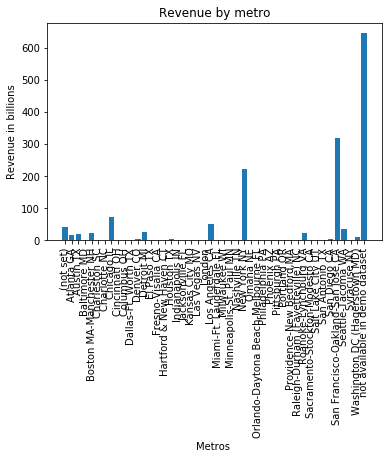

In [94]:
# plot sum of revenue in billions based on metro
x = metro_grp.index
y = metro_grp.values
plt.xlabel('Metros ')
plt.ylabel('Revenue in billions')
plt.title('Revenue by metro')
plt.bar(x,y)
plt.xticks(rotation = 90)
plt.show()

we can't see so the names of each metro city.  
let's see another way of finding the most revenue generating metros

In [115]:
# top 5 Revenue earning metros
sorted(metro_grp.index, reverse = True)[:5]

['not available in demo dataset',
 'Washington DC (Hagerstown MD)',
 'Syracuse NY',
 'Seattle-Tacoma WA',
 'San Francisco-Oakland-San Jose CA']

8- `Sub continent`

In [31]:
# group data by sub continent and revenue sum
sub_grp = df_part.groupby('subcontinent')['revenue(billions)'].sum()

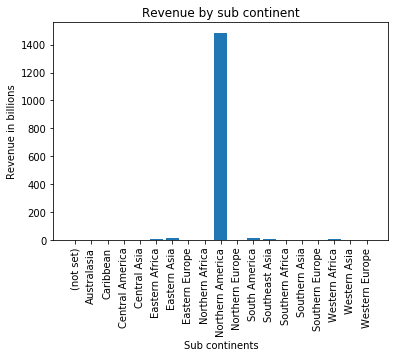

In [32]:
# plot sum of revenue in billions based on sub continent
x = sub_grp.index
y = sub_grp.values
plt.xlabel('Sub continents')
plt.ylabel('Revenue in billions')
plt.title('Revenue by sub continent')
plt.bar(x,y)
plt.xticks(rotation = 90)
plt.show()

`Northern America` is the most revenue generating sub continent

9- `Campaign`

In [33]:
# group data by campaign and revenue sum
camp_grp = df_part.groupby('campaign')['revenue(billions)'].sum()

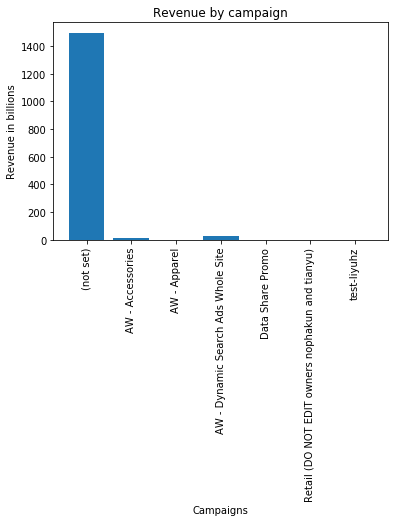

In [34]:
# plot sum of revenue in billions based on Campaign
x = camp_grp.index
y = camp_grp.values
plt.xlabel('Campaigns')
plt.ylabel('Revenue in billions')
plt.title('Revenue by campaign')
plt.bar(x,y)
plt.xticks(rotation = 90)
plt.show()

the bulk of `campaign` values are `not set`

10- `Medium`

In [35]:
# group data by medium and revenue sum
med_grp = df_part.groupby('medium')['revenue(billions)'].sum()

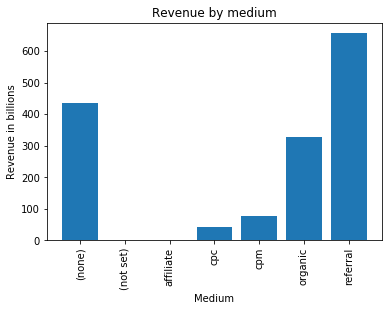

In [36]:
# plot sum of revenue in billions based on medium
x = med_grp.index
y = med_grp.values
plt.xlabel('Medium')
plt.ylabel('Revenue in billions')
plt.title('Revenue by medium')
plt.bar(x,y)
plt.xticks(rotation = 90)
plt.show()

`Referral` medium then `Organic` are the most revenue generative among the mediums

11- `Source`

In [37]:
# group data by source and revenue sum
src_grp = df_part.groupby('source')['revenue(billions)'].sum()

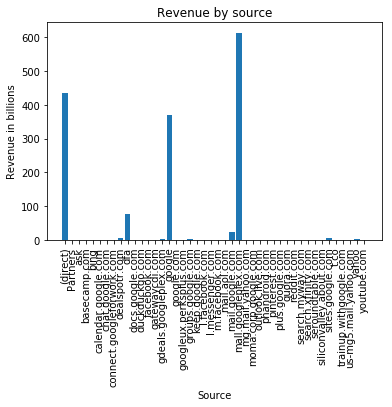

In [38]:
# plot sum of revenue in billions based on source
x = src_grp.index
y = src_grp.values
plt.xlabel('Source')
plt.ylabel('Revenue in billions')
plt.title('Revenue by source')
plt.bar(x,y)
plt.xticks(rotation = 90)
plt.show()

we can't see clearly through this plot 

12-`Page Views`

In [39]:
# group data by page views and revenue sum
pg_grp = df_part.groupby('pageviews')['revenue(billions)'].sum()

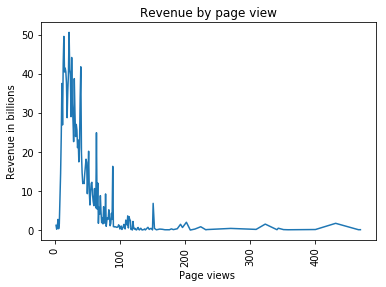

In [40]:
# plot sum of revenue in billions based on which browser used for generating that revenue
x = pg_grp.index
y = pg_grp.values
plt.xlabel('Page views ')
plt.ylabel('Revenue in billions')
plt.title('Revenue by page view')
plt.plot(x,y)
plt.xticks(rotation = 90)
plt.show()

As the page views are less than `100` there is profit.But, when the views exceed `100` the revenue drops under `10 billions`

13- `Hits`

In [41]:
# group data by hits and revenue sum
hit_grp = df_part.groupby('hits')['revenue(billions)'].sum()

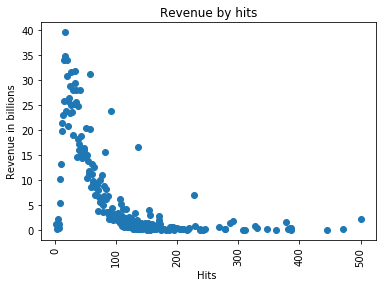

In [42]:
# plot sum of revenue in billions based on which browser used for generating that revenue
x = hit_grp.index
y = hit_grp.values
plt.xlabel('Hits ')
plt.ylabel('Revenue in billions')
plt.title('Revenue by hits')
plt.scatter(x,y)
plt.xticks(rotation = 90)
plt.show()

As the hits is less than `100` the profit is high.But, after that the revenue is dropping down to less than `5 billions`